#Import Data

In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import string

df = pd.read_csv('https://raw.githubusercontent.com/layadp/Red-Tagging-of-Lumad-Groups/main/code/Group16Dataset.csv')

# Feature Generation

In [ ]:
df['Date posted'] = pd.to_datetime(df['Date posted'], infer_datetime_format=True)
df['Year'] = df['Date posted'].dt.year
df['Month'] = df['Date posted'].dt.month
df['Time'] = df['Date posted'].dt.time
df['Day'] = df['Date posted'].dt.strftime('%A')
df['Engagements'] = df['Likes'] + df['Replies'] + df['Retweets'] + df['Quote Tweets']
df.head()

,ID,Timestamp,Tweet URL,Group,Category,Topic,Keywords,Account handle,Account name,Account type,...,Content type,Likes,Replies,Retweets,Quote Tweets,Year,Month,Time,Day,Engagements
0,16-1,26/03/23 23:01:18,https://twitter.com/gigaigurlmd/status/1557011...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, cpp, npa, ndf",@gigaigurlmd,Giga Basilio Igurashi🩺,Anonymous,...,Rational,1,1,0,0,2022,9,22:32:00,Thursday,2
1,16-2,27/03/23 01:25:28,https://twitter.com/Matina_Aplaya/status/15448...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, npa",@Matina_Aplaya,Matina Aplaya,Anonymous,...,"Rational, Emotional",43,0,15,1,2022,7,06:52:00,Thursday,59
2,16-3,28/03/23 11:57:55,https://twitter.com/RobeRose77/status/10698400...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, communist",@RobeRose77,Roby Rose,Identified,...,"Rational, Emotional",4,0,3,0,2018,4,14:25:00,Thursday,7
3,16-4,28/03/23 15:50:68,https://twitter.com/hitman531ph/status/1078354...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, cpp, npa, ndf",@hitman531ph,The Hitman,Anonymous,...,Rational,1,0,1,0,2018,12,02:18:00,Friday,2
4,16-5,28/03/23 16:04:00,https://twitter.com/dTnalakRiderSR/status/1077...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, cpp, npa, ndf",@dTnalakRiderSR,KulasSR,Anonymous,...,Rational,4,0,3,0,2018,12,23:26:00,Wednesday,7


# Preprocessing

## Ensuring No Missing Values

In [ ]:
df.isnull().sum()

ID                0
Timestamp         0
Tweet URL         0
Group             0
Category          0
Topic             0
Keywords          0
Account handle    0
Account name      0
Account type      0
Joined            0
Following         0
Followers         0
Tweet             0
Tweet Type        0
Date posted       0
Screenshot        0
Content type      0
Likes             0
Replies           0
Retweets          0
Quote Tweets      0
Year              0
Month             0
Time              0
Day               0
Engagements       0
dtype: int64

## Categorical Data Encoding

In [ ]:
df['Account type'] = df['Account type'].astype('category')
df['Account type category'] = df['Account type'].cat.codes
labelencoder = LabelEncoder()
df['Account type category'] = labelencoder.fit_transform(df['Account type category'])
df.head()

,ID,Timestamp,Tweet URL,Group,Category,Topic,Keywords,Account handle,Account name,Account type,...,Likes,Replies,Retweets,Quote Tweets,Year,Month,Time,Day,Engagements,Account type category
0,16-1,26/03/23 23:01:18,https://twitter.com/gigaigurlmd/status/1557011...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, cpp, npa, ndf",@gigaigurlmd,Giga Basilio Igurashi🩺,Anonymous,...,1,1,0,0,2022,9,22:32:00,Thursday,2,0
1,16-2,27/03/23 01:25:28,https://twitter.com/Matina_Aplaya/status/15448...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, npa",@Matina_Aplaya,Matina Aplaya,Anonymous,...,43,0,15,1,2022,7,06:52:00,Thursday,59,0
2,16-3,28/03/23 11:57:55,https://twitter.com/RobeRose77/status/10698400...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, communist",@RobeRose77,Roby Rose,Identified,...,4,0,3,0,2018,4,14:25:00,Thursday,7,1
3,16-4,28/03/23 15:50:68,https://twitter.com/hitman531ph/status/1078354...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, cpp, npa, ndf",@hitman531ph,The Hitman,Anonymous,...,1,0,1,0,2018,12,02:18:00,Friday,2,0
4,16-5,28/03/23 16:04:00,https://twitter.com/dTnalakRiderSR/status/1077...,16,REDT,Red-tagging of Lumads/Lumad schools,"lumad, cpp, npa, ndf",@dTnalakRiderSR,KulasSR,Anonymous,...,4,0,3,0,2018,12,23:26:00,Wednesday,7,0


## Standardization

Number of outliers in 'count' (std=1): 2
Number of outliers in 'count' (std=2): 1
Number of outliers in 'count' (std=3): 0


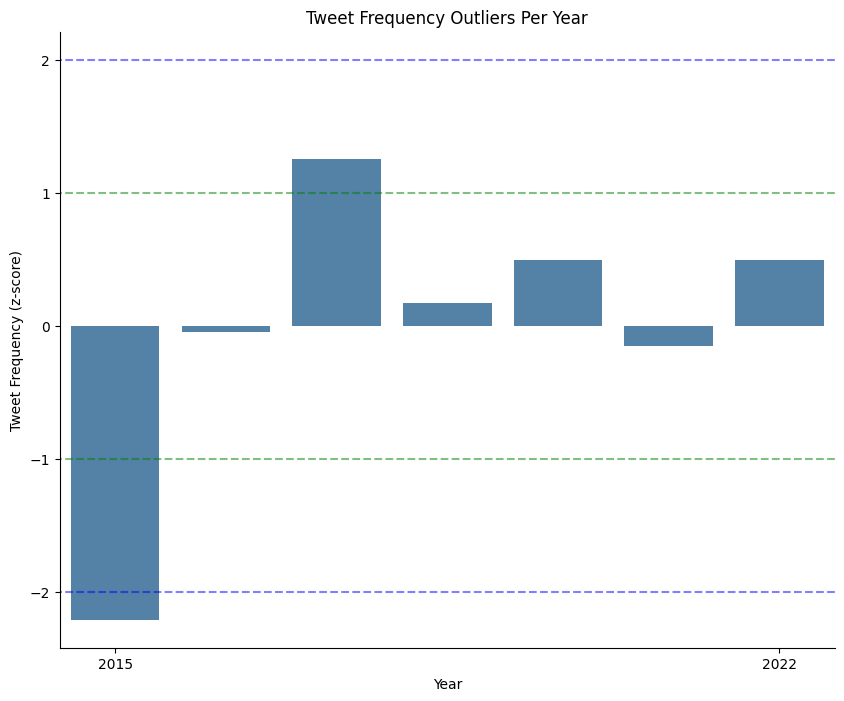

In [ ]:
# Create dataframe of tweet frequency per year
df_freq = pd.DataFrame({'count' : df.groupby( [ "Year"] ).size()}).reset_index()

# Standardization of tweet frequency per year
scaler = StandardScaler()
df_scaled = df_freq
df_scaled[['count']] = scaler.fit_transform(df_scaled[['count']])

freq_zscore = df_scaled['count']
n_out1 = len(freq_zscore[abs(freq_zscore) > 1])
n_out2 = len(freq_zscore[abs(freq_zscore) > 2])
n_out3 = len(freq_zscore[abs(freq_zscore) > 3])
print(f"Number of outliers in 'count' (std=1): {n_out1}")
print(f"Number of outliers in 'count' (std=2): {n_out2}")
print(f"Number of outliers in 'count' (std=3): {n_out3}")


# Create a figure 
fig, (ax1) = plt.subplots(figsize=(10, 8))

sns.barplot(x = df_scaled['Year'], y = df_scaled['count'], ax=ax1, color='steelblue')

sns.despine(ax=ax1)
ax1.set(title='Tweet Frequency Outliers Per Year', xlabel='Year', ylabel='Tweet Frequency (z-score)')
ax1.set_xticks([0, len(df_scaled)-1])
ax1.axhline(y=2, xmin=-0.5, xmax=len(df_scaled)-0.5, color='blue', alpha=0.5, ls='--') # Standard deviation lines
ax1.axhline(y=-2, xmin=-0.5, xmax=len(df_scaled)-0.5, color='blue', alpha=0.5, ls='--')
ax1.axhline(y=-1, xmin=-0.5, xmax=len(df_scaled)-0.5, color='green', alpha=0.5, ls='--')
ax1.axhline(y=1, xmin=-0.5, xmax=len(df_scaled)-0.5, color='green', alpha=0.5, ls='--')


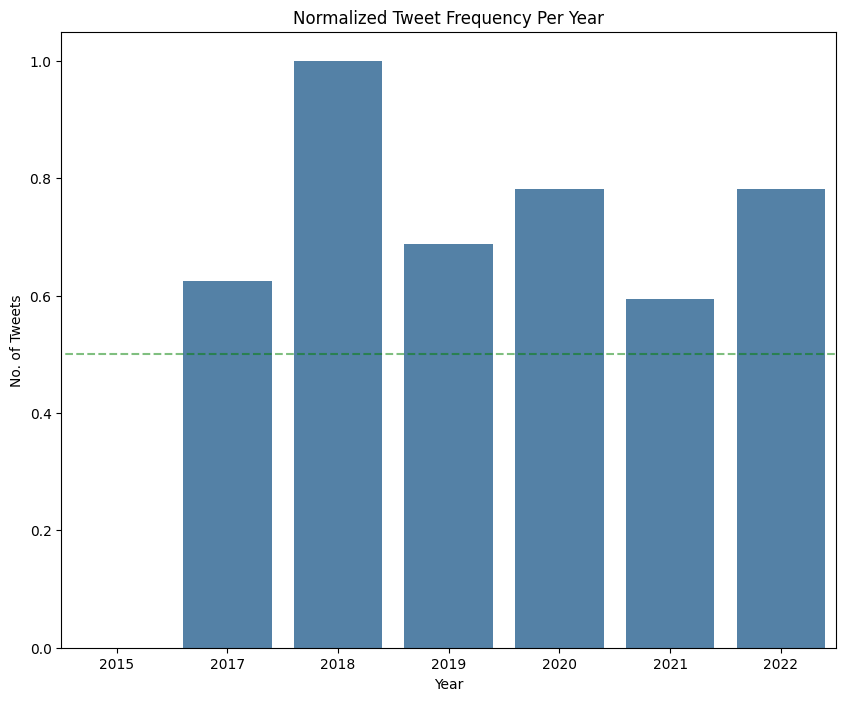

In [ ]:
# Min-Max Normalization of tweet frequency per year
df_norm = df_freq
df_norm['count'] = (df_norm['count']-df_norm['count'].min())/(df_norm['count'].max()-df_norm['count'].min())
df_norm

fig, (ax2) = plt.subplots(figsize=(10, 8))

sns.barplot(x = df_norm['Year'], y = df_norm['count'], ax=ax2, color='steelblue')
ax2.set(title='Normalized Tweet Frequency Per Year', xlabel='Year', ylabel='No. of Tweets')
ax2.axhline(y=0.5, xmin=-0.5, xmax=len(df_scaled)-0.5, color='green', alpha=0.5, ls='--')


# Time Series Analysis

## Binning

Text(0.5, 1.0, 'Number of Mis/Disinfo Tweets about Lumad Redtagging per Year')

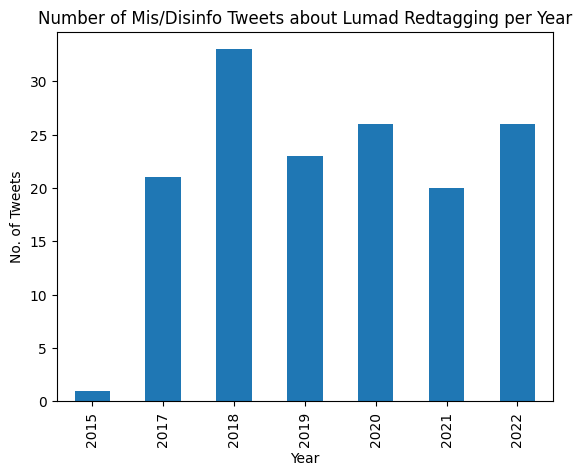

In [ ]:
# According to year
df.groupby(df['Year']).size().plot.bar()
plt.ylabel("No. of Tweets")
plt.title("Number of Mis/Disinfo Tweets about Lumad Redtagging per Year")

Text(0.5, 1.0, 'Number of Mis/Disinfo Tweets about Lumad Redtagging per Day of the Week')

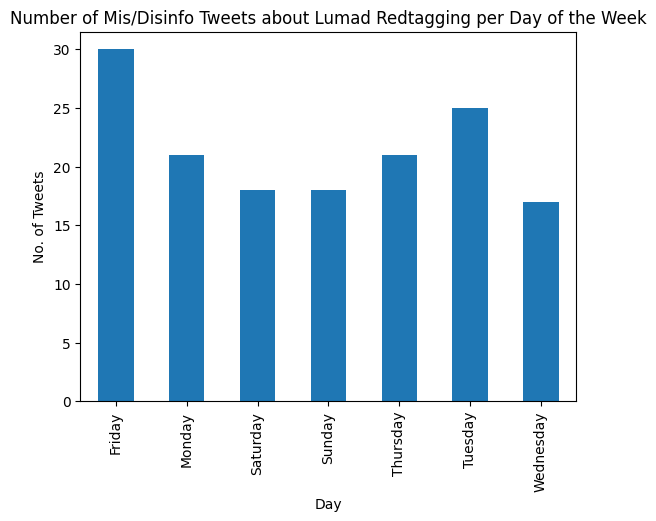

In [ ]:
# According to day
df.groupby(df['Day']).size().plot.bar()
plt.ylabel("No. of Tweets")
plt.title("Number of Mis/Disinfo Tweets about Lumad Redtagging per Day of the Week")

Text(0.5, 1.0, 'Number of Mis/Disinfo Tweets about Lumad Redtagging per Hour of the Day')

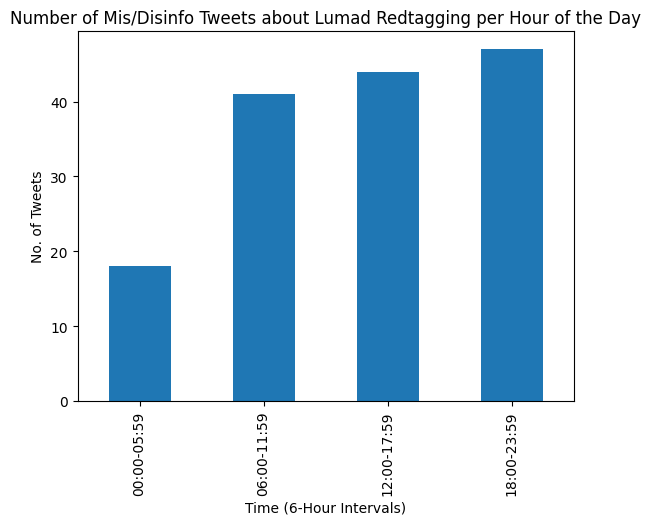

In [ ]:
# According to time
hours = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour
bins = [0, 6, 12, 18, 24]
labels = ['00:00-05:59', '06:00-11:59', '12:00-17:59', '18:00-23:59']
df['Time Bin'] = pd.cut(hours, bins, labels=labels, right=False)
df.groupby(df['Time Bin']).size().plot.bar()
plt.xlabel("Time (6-Hour Intervals)")
plt.ylabel("No. of Tweets")
plt.title("Number of Mis/Disinfo Tweets about Lumad Redtagging per Hour of the Day")

# Visualization

## Scatter Plot

Text(0.5, 1.0, 'Year Posted vs. Tweet Engagement')

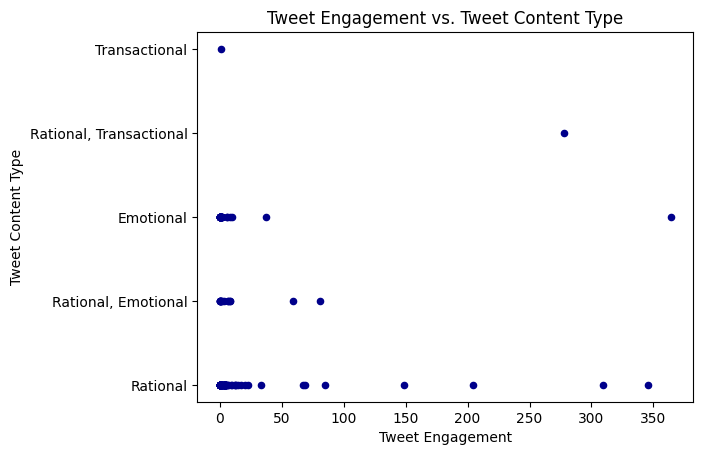

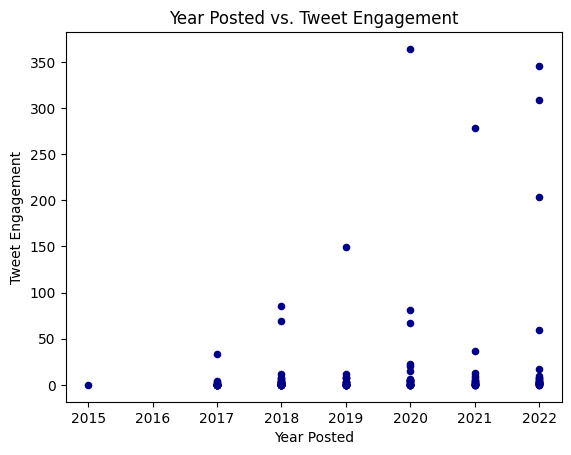

In [ ]:
df['Engagements'] = df['Likes'] + df['Replies'] + df['Retweets'] + df['Quote Tweets']

ax1 = df.plot.scatter(x='Engagements', y='Content type', c='DarkBlue')
plt.xlabel("Tweet Engagement")
plt.ylabel("Tweet Content Type")
plt.title("Tweet Engagement vs. Tweet Content Type")

ax2 = df.plot.scatter(x='Year', y='Engagements', c='DarkBlue')
plt.xlabel("Year Posted")
plt.ylabel("Tweet Engagement")
plt.title("Year Posted vs. Tweet Engagement")

## Heatmap

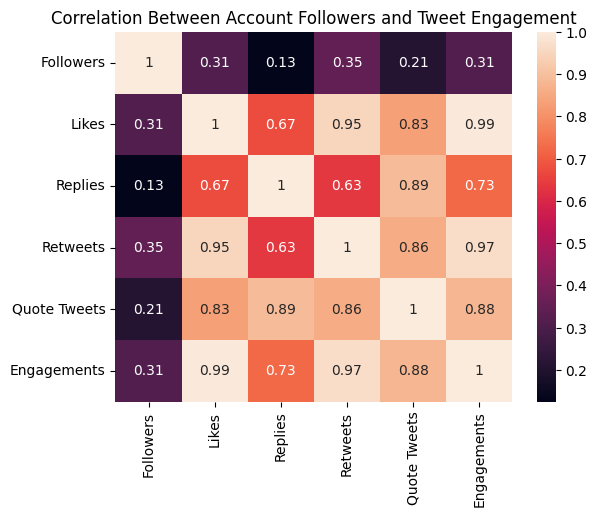

In [ ]:
dataplot = sns.heatmap(df[['Followers','Likes','Replies','Retweets','Quote Tweets','Engagements']].corr(), annot=True)
plt.title("Correlation Between Account Followers and Tweet Engagement")
plt.show()

## Bar Graph

Text(0.5, 1.0, 'Frequency of Keywords')

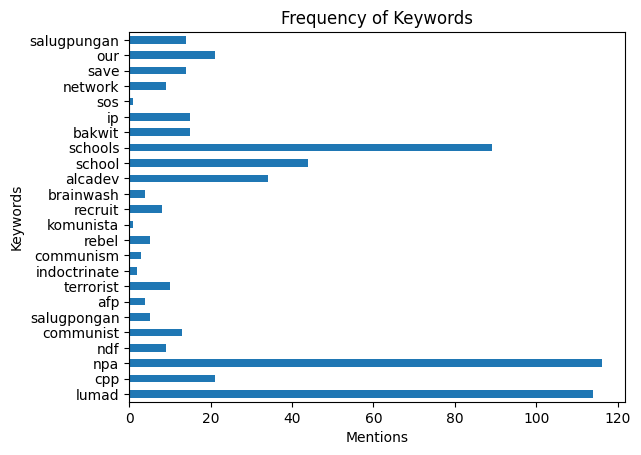

In [ ]:
# 1 Remove punctuation marks
df['Cleaned Tweet'] = [t.translate(str.maketrans('', '', string.punctuation)) for t in df['Tweet']]

# 2 Get tweet keyword frequency
word_freq = df['Cleaned Tweet'].str.lower().str.split().explode().value_counts()

# 3 Filter only keywords
keywords = df['Keywords'].str.lower().str.split(", ").explode().unique()
word_freq = word_freq.filter(items=keywords, axis=0) #25

# 4 Plot
word_freq.plot.barh()
plt.xlabel("Mentions")
plt.ylabel("Keywords")
plt.title("Frequency of Keywords")


## Line Graph

Text(0.5, 1.0, 'Number of Mis/Disinfo Tweets about Lumad Redtagging per Year')

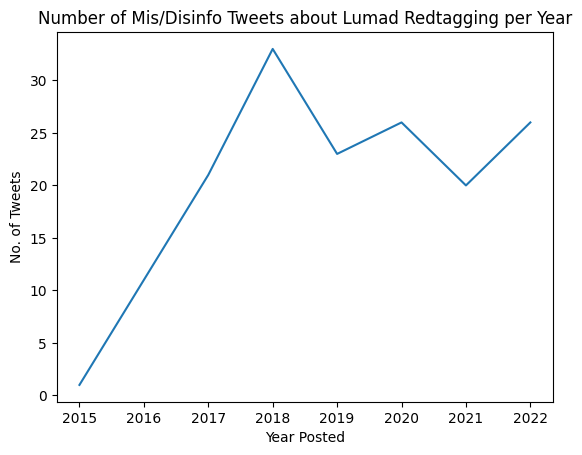

In [ ]:
df.groupby(df['Year']).size().plot()
plt.xlabel("Year Posted")
plt.ylabel("No. of Tweets")
plt.title("Number of Mis/Disinfo Tweets about Lumad Redtagging per Year")